## DATA ANALYSIS

In [1]:
import pandas as pd
data_frame =   pd.read_csv('data/spotify_features.csv')
data_frame.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [2]:
final_genres = ['Indie','Jazz','Pop','Electronic','Folk','Hip-Hop','Rock','Alternative','Classical','Rap','World','Soul','Blues','R&B','Reggaeton','Reggae','Dance','Country']
data_frame = data_frame[data_frame['genre'].isin(final_genres)]
data_frame.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.3600,0.563,240597,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,4/4,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660


In [3]:
trackids = data_frame['track_id'].unique()

In [4]:
trackid = '2YegxR5As7BeQuVp2U6pek'
data_frame.genre[data_frame['track_id']==trackid].values

array(['R&B', 'Dance', 'Hip-Hop', 'Pop', 'Soul'], dtype=object)

In [5]:
columns_to_keep = ['track_id','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']
row = data_frame[data_frame['track_id']==trackid][columns_to_keep].iloc[0].to_dict()

In [6]:
from tqdm import tqdm
columns_to_keep = ['track_id','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']
data = []
for trackid in tqdm(trackids):
    genres = data_frame.genre[data_frame['track_id']==trackid].values
    row = data_frame[data_frame['track_id']==trackid][columns_to_keep].iloc[0].to_dict()
    row['genres'] = genres
    data.append(row)    

100%|██████████| 120039/120039 [22:11<00:00, 90.12it/s]


In [7]:
df = pd.DataFrame(data, index=range(len(trackids)))
df.head()

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genres
0,2YegxR5As7BeQuVp2U6pek,0.0830,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,0.6930,"[R&B, Dance, Hip-Hop, Pop, Soul]"
1,6KFaHC9G178beAp7P0Vi5S,0.3230,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,0.3230,"[R&B, Dance, Pop]"
2,6muW8cSjJ3rusKJ0vH5olw,0.0675,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,0.0862,"[R&B, Pop]"
3,7yHqOZfsXYlicyoMt62yC6,0.3600,0.563,240597,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,4/4,0.7680,"[R&B, Indie, Soul]"
4,4XzgjxGKqULifVf7mnDIQK,0.5960,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,0.4660,"[R&B, Dance, Indie, Pop]"


In [8]:
df.drop(['track_id','duration_ms','instrumentalness','time_signature'], axis=1, inplace=True)

In [9]:
df.to_csv('data/spotify_features_genres.csv', index= False)

## Data Preprocessing

In [5]:
import pandas as pd
df = pd.read_csv('data/spotify_features_genres.csv')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

In [7]:
NUMERIC_COLUMNS_TO_SCALE = ['loudness', 'tempo']
# CATEGORICAL_COLUMNS_TO_ONE_HOT_ENCODE = ['key', 'mode', 'time_signature']
CATEGORICAL_COLUMNS_TO_ONE_HOT_ENCODE = ['key', 'mode' ]

In [8]:
def preprocess_input_data(data_frame):
  z_score_scaler = sklearn.preprocessing.StandardScaler(copy = True)
  data_frame[NUMERIC_COLUMNS_TO_SCALE] = z_score_scaler.fit_transform(data_frame[NUMERIC_COLUMNS_TO_SCALE].to_numpy())

  # Apply one-hot encoding to categorical features.
  # data_frame = pd.get_dummies(
  #   data_frame,
  #   columns = CATEGORICAL_COLUMNS_TO_ONE_HOT_ENCODE,
  #   sparse = False
  # )
  # data_frame.drop( ['mode_Major'],inplace=True, axis=1)
  data_frame.drop(CATEGORICAL_COLUMNS_TO_ONE_HOT_ENCODE,inplace=True, axis=1)
  return data_frame


In [9]:
data_framex = preprocess_input_data(df)
data_framex.head()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,genres
0,0.0830,0.724,0.689,0.3040,0.542740,0.1350,0.908827,0.6930,['R&B' 'Dance' 'Hip-Hop' 'Pop' 'Soul']
1,0.3230,0.685,0.610,0.1020,0.667168,0.0439,-0.817478,0.3230,['R&B' 'Dance' 'Pop']
2,0.0675,0.762,0.520,0.1140,0.664328,0.0959,-1.458051,0.0862,['R&B' 'Pop']
3,0.3600,0.563,0.366,0.0955,0.369854,0.1210,-1.116679,0.7680,['R&B' 'Indie' 'Soul']
4,0.5960,0.653,0.621,0.0811,0.578418,0.0409,-0.631239,0.4660,['R&B' 'Dance' 'Indie' 'Pop']


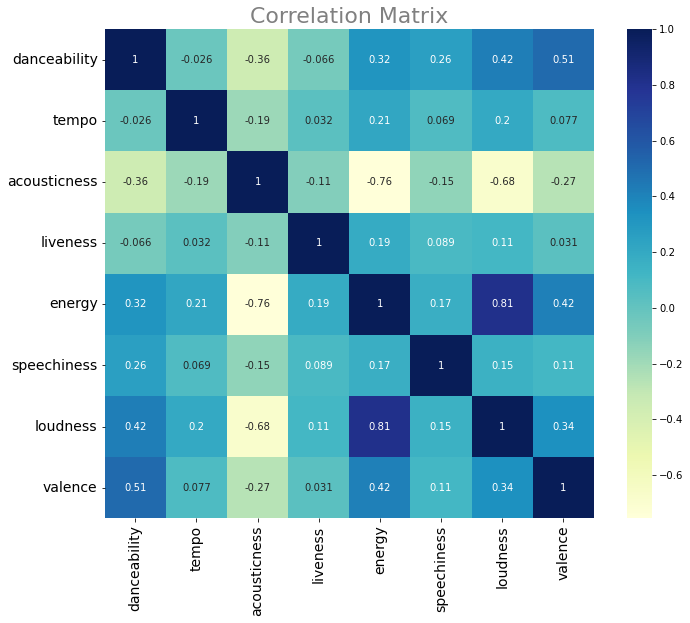

In [13]:
import seaborn as sns
# plot correlation matrix
corr = data_framex[list(set(data_framex.columns)-{'genres'})].corr()
plt.figure(figsize = (12, 9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Matrix', fontsize=22, color='grey')
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap="YlGnBu")
plt.show()

In [15]:
unique = data_frame['genre'].unique()

In [16]:
import torch
torch.autograd.set_detect_anomaly(True)
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import (
    Dataset,
    DataLoader,
)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(unique)

In [17]:
y = []
for genres in df['genres'].values:
    y.append(label_encoder.transform(genres))
y = np.array(y, dtype=object)

In [25]:
class CustomDataset(Dataset):
    def __init__ (self, dfx, genres):
        df = dfx.copy()
        del df['genres']
        X = df.values
        self.data = X.astype(np.float32)
        self.targets = genres
    
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, index):
        template = np.zeros(len(unique), dtype=np.float32)
        for i in self.targets[index]:
            template[i] = 1
        return torch.tensor(self.data[index]), torch.tensor(template)

ds = CustomDataset(data_framex, y)

In [26]:
ds.data.shape, ds.targets.shape

((120039, 8), (120039,))

In [27]:
from sklearn import model_selection
train_data_set, test_data_set = model_selection.train_test_split(
ds,
test_size = 20000,
shuffle = True
)

train_data_loader = DataLoader(
train_data_set,
batch_size = 128,
shuffle = True
)

test_data_loader = DataLoader(
test_data_set,
batch_size = 64,
shuffle = True
)

In [28]:
train_size = len(train_data_loader.dataset)
val_size = len(test_data_loader.dataset)
train_size, val_size

(100039, 20000)

In [29]:
import torch

class ClassificationModel(torch.nn.Module):
  def __init__(self):
    super(ClassificationModel, self).__init__()

    self.linear1 = torch.nn.Linear(ds[0][0].shape[0], 128)
    self.relu1 = torch.nn.ReLU()
    self.linear_final = torch.nn.Linear(128, len(unique))
    
  def forward(self, data):
    data = data.float()

    data = self.relu1(self.linear1(data))
    # data = self.relu2(self.linear2(data))
    # data = self.dropout(data)
    # data = self.relu3(self.linear3(data))
    data = self.linear_final(data)
    return data

In [30]:
import torch
import numpy as np

class EarlyStopping:
    def __init__(self, patience=7, verbose=True, delta=0, path='model.pth', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model, 'genre__model.pth')
        self.val_loss_min = val_loss

In [31]:
import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ClassificationModel()
model.to(device)

criterion = torch.nn.BCEWithLogitsLoss()

def calculate_correct_samples(predictions, targets):
    correct_samples = 0
    for prediction, target in zip(predictions, targets):
        true_indexes = np.where(target != 0)[0]
        predicted_indexes = prediction.argsort()[::-1][:len(true_indexes+1)][::-1]
        correct_samples += (predicted_indexes == true_indexes).sum()/len(true_indexes)
    return correct_samples

def fit(num_epochs, learning_rate, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    valid_losses = []
    avg_train_losses = []
    avg_valid_losses = [] 

    early_stopping = EarlyStopping(patience=20, verbose=True)

    for epoch in range(num_epochs):
        losses = []
        correct = 0
        
        model.train()
        for (data, targets) in tqdm.tqdm(train_loader, desc= "Training"):
            data = data.to(device)
            targets = targets.to(device)
            
            optimizer.zero_grad()
            
            scores = model(data)
            
            loss = criterion(scores, targets)
            
            losses.append(loss.item())
            
            loss.backward()

            torch.nn.utils.clip_grad_value_(model.parameters(), 0.1)

            optimizer.step()
            
            correct += calculate_correct_samples(scores.cpu().detach().numpy(), targets.cpu().detach().numpy())
            train_losses.append(loss.item())
    
        
        model.eval()
        correct_ = 0
        for data, target in tqdm.tqdm(val_loader, desc= "Evaluation"):
          data = data.to(device)
          target = target.to(device)
          output = model(data)            
          loss = criterion(output, target)
          valid_losses.append(loss.item())
          correct_ += calculate_correct_samples(scores.cpu().detach().numpy(), targets.cpu().detach().numpy())
        
        accuracy = 100 * correct / train_size
        val_accuracy = 100 * correct_ / val_size

        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        print(f"{epoch+1} || valid_loss: {valid_loss} | train_loss: {train_loss} | accuracy: {accuracy} | val_accuracy: {val_accuracy}")
        
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        
        train_losses = []
        valid_losses = []

def check_accuracy(loader, model):
    print("Checking accuracy on test data")

    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in tqdm.tqdm(loader):
            x = x.to(device)
            y = y.to(device)

            scores = model(x)
            num_correct += calculate_correct_samples(scores.cpu().detach().numpy(), y.cpu().detach().numpy())
            num_samples += 1*x.shape[0]

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    model.train()

In [32]:
lr = 0.001
epochs = 1000
history1 = fit(epochs, lr, model, train_data_loader, test_data_loader)

Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.42it/s]


1 || valid_loss: 0.23118044340762847 | train_loss: 0.25970778278911205 | accuracy: 20.95804540990919 | val_accuracy: 25.300833333333347
Validation loss decreased (inf --> 0.231180).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.39it/s]


2 || valid_loss: 0.2243358300992856 | train_loss: 0.22742292063925273 | accuracy: 26.2933075148311 | val_accuracy: 25.952916666666642
Validation loss decreased (0.231180 --> 0.224336).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.88it/s]


3 || valid_loss: 0.2214979753136254 | train_loss: 0.22322970884077994 | accuracy: 27.646579738663853 | val_accuracy: 21.1275
Validation loss decreased (0.224336 --> 0.221498).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 778.97it/s]


4 || valid_loss: 0.219235744720069 | train_loss: 0.2205595760165578 | accuracy: 28.587765057341887 | val_accuracy: 38.86416666666649
Validation loss decreased (0.221498 --> 0.219236).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.79it/s]


5 || valid_loss: 0.21771643679743757 | train_loss: 0.21863873607819648 | accuracy: 29.242150323278654 | val_accuracy: 25.56166666666665
Validation loss decreased (0.219236 --> 0.217716).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.95it/s]


6 || valid_loss: 0.2166639051783961 | train_loss: 0.21729526735480179 | accuracy: 29.599908416669834 | val_accuracy: 34.951666666666526
Validation loss decreased (0.217716 --> 0.216664).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.71it/s]


7 || valid_loss: 0.21568850401681833 | train_loss: 0.2163201906644475 | accuracy: 29.845886294821224 | val_accuracy: 33.25625
Validation loss decreased (0.216664 --> 0.215689).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 749.27it/s]


8 || valid_loss: 0.21499030420574516 | train_loss: 0.21556924367347335 | accuracy: 30.03532193872959 | val_accuracy: 41.34208333333351
Validation loss decreased (0.215689 --> 0.214990).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.67it/s]


9 || valid_loss: 0.21439614658728956 | train_loss: 0.21494975000086342 | accuracy: 30.281118935043878 | val_accuracy: 34.61258333333344
Validation loss decreased (0.214990 --> 0.214396).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.05it/s]


10 || valid_loss: 0.2138447106931918 | train_loss: 0.21443265703175685 | accuracy: 30.35069180162592 | val_accuracy: 31.273916666666697
Validation loss decreased (0.214396 --> 0.213845).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.22it/s]


11 || valid_loss: 0.21345421652824353 | train_loss: 0.21396709267821762 | accuracy: 30.44885351855633 | val_accuracy: 37.56
Validation loss decreased (0.213845 --> 0.213454).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.90it/s]


12 || valid_loss: 0.21317059444352843 | train_loss: 0.21355500081768425 | accuracy: 30.6435823362222 | val_accuracy: 32.99541666666654
Validation loss decreased (0.213454 --> 0.213171).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.23it/s]


13 || valid_loss: 0.21305694147801627 | train_loss: 0.21318672372557013 | accuracy: 30.617130747579868 | val_accuracy: 35.2125
Validation loss decreased (0.213171 --> 0.213057).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.05it/s]


14 || valid_loss: 0.2124868790372111 | train_loss: 0.21288117842601084 | accuracy: 30.734708701701557 | val_accuracy: 35.525499999999816
Validation loss decreased (0.213057 --> 0.212487).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.22it/s]


15 || valid_loss: 0.2123561023047176 | train_loss: 0.21255681530365247 | accuracy: 30.77998390151647 | val_accuracy: 34.69083333333347
Validation loss decreased (0.212487 --> 0.212356).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.67it/s]


16 || valid_loss: 0.2120712964108196 | train_loss: 0.2122988192283589 | accuracy: 30.981012643164338 | val_accuracy: 30.88266666666669
Validation loss decreased (0.212356 --> 0.212071).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.69it/s]


17 || valid_loss: 0.21191104065876798 | train_loss: 0.21205661470627846 | accuracy: 31.02362459593137 | val_accuracy: 26.344166666666634
Validation loss decreased (0.212071 --> 0.211911).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.04it/s]


18 || valid_loss: 0.21167006622107265 | train_loss: 0.21183769140020967 | accuracy: 31.09911896265218 | val_accuracy: 31.612999999999825
Validation loss decreased (0.211911 --> 0.211670).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.30it/s]


19 || valid_loss: 0.2114711999417113 | train_loss: 0.21161012079023644 | accuracy: 31.12275736272371 | val_accuracy: 33.25625
Validation loss decreased (0.211670 --> 0.211471).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.08it/s]


20 || valid_loss: 0.2113197234015876 | train_loss: 0.2114342934716388 | accuracy: 31.263769034838298 | val_accuracy: 37.29916666666651
Validation loss decreased (0.211471 --> 0.211320).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.50it/s]


21 || valid_loss: 0.21123276679470135 | train_loss: 0.21122000920955483 | accuracy: 31.222420874906394 | val_accuracy: 39.125
Validation loss decreased (0.211320 --> 0.211233).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.25it/s]


22 || valid_loss: 0.21098631220503736 | train_loss: 0.21101446234432938 | accuracy: 31.29049194623617 | val_accuracy: 47.210833333333376
Validation loss decreased (0.211233 --> 0.210986).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.02it/s]


23 || valid_loss: 0.21092997824612517 | train_loss: 0.2108847068627472 | accuracy: 31.337033318910365 | val_accuracy: 34.43
Validation loss decreased (0.210986 --> 0.210930).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.35it/s]


24 || valid_loss: 0.21087507065683128 | train_loss: 0.2107133568667085 | accuracy: 31.36636711682444 | val_accuracy: 37.56
Validation loss decreased (0.210930 --> 0.210875).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 733.85it/s]


25 || valid_loss: 0.2106398573508278 | train_loss: 0.2106053449042008 | accuracy: 31.47393706930481 | val_accuracy: 42.51583333333348
Validation loss decreased (0.210875 --> 0.210640).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.25it/s]


26 || valid_loss: 0.21042948223341007 | train_loss: 0.21046990537277574 | accuracy: 31.5417534780483 | val_accuracy: 32.34333333333345
Validation loss decreased (0.210640 --> 0.210429).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 781.18it/s]


27 || valid_loss: 0.21029056737217278 | train_loss: 0.2102986652870922 | accuracy: 31.526652224679935 | val_accuracy: 27.126666666666623
Validation loss decreased (0.210429 --> 0.210291).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.66it/s]


28 || valid_loss: 0.2101762554706476 | train_loss: 0.2101487697047346 | accuracy: 31.629000404128096 | val_accuracy: 38.0816666666665
Validation loss decreased (0.210291 --> 0.210176).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 782.41it/s]


29 || valid_loss: 0.21049354946651397 | train_loss: 0.21006782097584756 | accuracy: 31.7249391784823 | val_accuracy: 29.213333333333406
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 777.93it/s]


30 || valid_loss: 0.21009896714656878 | train_loss: 0.2099507171327196 | accuracy: 31.615205784029918 | val_accuracy: 33.51708333333346
Validation loss decreased (0.210176 --> 0.210099).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.67it/s]


31 || valid_loss: 0.2100458557899006 | train_loss: 0.20981171972992474 | accuracy: 31.6976117409448 | val_accuracy: 47.471666666666636
Validation loss decreased (0.210099 --> 0.210046).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.86it/s]


32 || valid_loss: 0.20976116010746637 | train_loss: 0.2097819590240793 | accuracy: 31.63477672279239 | val_accuracy: 24.77916666666666
Validation loss decreased (0.210046 --> 0.209761).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.22it/s]


33 || valid_loss: 0.2098175588602456 | train_loss: 0.2096355332399878 | accuracy: 31.780467522428133 | val_accuracy: 31.56083333333344
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.76it/s]


34 || valid_loss: 0.20973897332581468 | train_loss: 0.20956765334395802 | accuracy: 31.82009492488405 | val_accuracy: 28.482999999999837
Validation loss decreased (0.209761 --> 0.209739).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.61it/s]


35 || valid_loss: 0.2096156553624156 | train_loss: 0.20949752586881829 | accuracy: 31.840482211937317 | val_accuracy: 30.647916666666575
Validation loss decreased (0.209739 --> 0.209616).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 729.02it/s]


36 || valid_loss: 0.20970920632822446 | train_loss: 0.20937139556154877 | accuracy: 31.825671321517916 | val_accuracy: 34.74299999999981
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 761.10it/s]


37 || valid_loss: 0.20947270161998918 | train_loss: 0.20926036718099014 | accuracy: 31.91448430350258 | val_accuracy: 40.168333333333514
Validation loss decreased (0.209616 --> 0.209473).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.87it/s]


38 || valid_loss: 0.20948780692233065 | train_loss: 0.209207466782054 | accuracy: 31.954651971445386 | val_accuracy: 29.08291666666659
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 778.43it/s]


39 || valid_loss: 0.20947729612882146 | train_loss: 0.2091412373706508 | accuracy: 31.972061848260108 | val_accuracy: 40.168333333333514
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 781.02it/s]


40 || valid_loss: 0.2093995850021466 | train_loss: 0.20905910695300384 | accuracy: 32.02259452146992 | val_accuracy: 35.2125
Validation loss decreased (0.209473 --> 0.209400).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 726.20it/s]


41 || valid_loss: 0.20951551603623472 | train_loss: 0.20895543789772122 | accuracy: 31.946740771099243 | val_accuracy: 40.27266666666677
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 755.49it/s]


42 || valid_loss: 0.20919964888606207 | train_loss: 0.20890492101764435 | accuracy: 32.12345280578669 | val_accuracy: 35.73416666666652
Validation loss decreased (0.209400 --> 0.209200).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.59it/s]


43 || valid_loss: 0.20917324897961115 | train_loss: 0.20887396212124154 | accuracy: 32.01501890453197 | val_accuracy: 30.5175
Validation loss decreased (0.209200 --> 0.209173).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 766.88it/s]


44 || valid_loss: 0.20910399519026088 | train_loss: 0.20880989501695804 | accuracy: 32.09041807028587 | val_accuracy: 37.29916666666651
Validation loss decreased (0.209173 --> 0.209104).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.55it/s]


45 || valid_loss: 0.2091020675132069 | train_loss: 0.2087434380484359 | accuracy: 31.998708598884498 | val_accuracy: 40.820416666666475
Validation loss decreased (0.209104 --> 0.209102).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.56it/s]


46 || valid_loss: 0.20882002876018183 | train_loss: 0.20866568992509865 | accuracy: 32.15269378275804 | val_accuracy: 28.6916666666666
Validation loss decreased (0.209102 --> 0.208820).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.79it/s]


47 || valid_loss: 0.2089942923178688 | train_loss: 0.20862315589433436 | accuracy: 32.12892448135701 | val_accuracy: 37.4295833333335
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 779.23it/s]


48 || valid_loss: 0.20879633310503853 | train_loss: 0.20856428310236969 | accuracy: 32.09366442325583 | val_accuracy: 40.168333333333514
Validation loss decreased (0.208820 --> 0.208796).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.78it/s]


49 || valid_loss: 0.20895084100790298 | train_loss: 0.2084920107937225 | accuracy: 32.12731558501706 | val_accuracy: 47.99333333333336
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.33it/s]


50 || valid_loss: 0.20883134126472777 | train_loss: 0.20846695418629196 | accuracy: 32.15536416987851 | val_accuracy: 46.1675
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 780.11it/s]


51 || valid_loss: 0.20872022111575825 | train_loss: 0.20841691991709688 | accuracy: 32.177707836800764 | val_accuracy: 38.0816666666665
Validation loss decreased (0.208796 --> 0.208720).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.57it/s]


52 || valid_loss: 0.20868711587720024 | train_loss: 0.2083846955081386 | accuracy: 32.136164514886765 | val_accuracy: 33.17799999999982
Validation loss decreased (0.208720 --> 0.208687).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 777.69it/s]


53 || valid_loss: 0.2086564306729137 | train_loss: 0.20832304134393287 | accuracy: 32.26232483617102 | val_accuracy: 40.03791666666648
Validation loss decreased (0.208687 --> 0.208656).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.51it/s]


54 || valid_loss: 0.2086296253882277 | train_loss: 0.20825449499251592 | accuracy: 32.22291401591476 | val_accuracy: 43.27224999999975
Validation loss decreased (0.208656 --> 0.208630).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.34it/s]


55 || valid_loss: 0.20856614715565508 | train_loss: 0.20824511130066478 | accuracy: 32.26124192517298 | val_accuracy: 32.60416666666655
Validation loss decreased (0.208630 --> 0.208566).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 762.60it/s]


56 || valid_loss: 0.20875580827839457 | train_loss: 0.20819694230623562 | accuracy: 32.26182265107081 | val_accuracy: 42.77666666666652
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.25it/s]


57 || valid_loss: 0.20862805871917797 | train_loss: 0.2081646333112741 | accuracy: 32.312895589767564 | val_accuracy: 31.43041666666656
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.41it/s]


58 || valid_loss: 0.20882931842019384 | train_loss: 0.20811756881301666 | accuracy: 32.21511467670462 | val_accuracy: 36.255833333333484
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.15it/s]


59 || valid_loss: 0.20855317743251117 | train_loss: 0.2080662429828168 | accuracy: 32.2912349897825 | val_accuracy: 42.255
Validation loss decreased (0.208566 --> 0.208553).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.78it/s]


60 || valid_loss: 0.2083338725681122 | train_loss: 0.20807201920262994 | accuracy: 32.390320156091505 | val_accuracy: 39.125
Validation loss decreased (0.208553 --> 0.208334).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.25it/s]


61 || valid_loss: 0.2086564708536806 | train_loss: 0.20803938857506 | accuracy: 32.32465528919911 | val_accuracy: 34.01266666666672
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 778.02it/s]


62 || valid_loss: 0.20850394004450057 | train_loss: 0.20799538632259346 | accuracy: 32.32904643379556 | val_accuracy: 40.168333333333514
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.33it/s]


63 || valid_loss: 0.2084271725469504 | train_loss: 0.20796547104101962 | accuracy: 32.33822618702511 | val_accuracy: 43.82
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 726.21it/s]


64 || valid_loss: 0.20844037778461322 | train_loss: 0.20794309071643882 | accuracy: 32.272677941317134 | val_accuracy: 36.7775
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 778.24it/s]


65 || valid_loss: 0.20829721504506973 | train_loss: 0.20788647733685917 | accuracy: 32.35003348694009 | val_accuracy: 29.474166666666587
Validation loss decreased (0.208334 --> 0.208297).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.65it/s]


66 || valid_loss: 0.2083738269135594 | train_loss: 0.2078172048682447 | accuracy: 32.324564848280595 | val_accuracy: 43.55916666666654
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.96it/s]


67 || valid_loss: 0.2083017895587336 | train_loss: 0.2077836453381097 | accuracy: 32.383967871577696 | val_accuracy: 34.951666666666526
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.60it/s]


68 || valid_loss: 0.20837844936801983 | train_loss: 0.20777691752099625 | accuracy: 32.4260657391236 | val_accuracy: 30.256666666666582
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.89it/s]


69 || valid_loss: 0.20851098643705107 | train_loss: 0.20777553138906693 | accuracy: 32.3745025154475 | val_accuracy: 23.08375
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.39it/s]


70 || valid_loss: 0.20837245348352976 | train_loss: 0.20773795807300627 | accuracy: 32.42824108121638 | val_accuracy: 34.43
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.17it/s]


71 || valid_loss: 0.20823565777688743 | train_loss: 0.20775192318593755 | accuracy: 32.36245721311545 | val_accuracy: 38.86416666666649
Validation loss decreased (0.208297 --> 0.208236).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.98it/s]


72 || valid_loss: 0.2086032233394373 | train_loss: 0.20770068887783133 | accuracy: 32.3923907771207 | val_accuracy: 31.3
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.59it/s]


73 || valid_loss: 0.20821019940482924 | train_loss: 0.20766436640182726 | accuracy: 32.43170877643433 | val_accuracy: 30.90875
Validation loss decreased (0.208236 --> 0.208210).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.29it/s]


74 || valid_loss: 0.20810698486935977 | train_loss: 0.20761867566867862 | accuracy: 32.423642874516986 | val_accuracy: 37.872999999999806
Validation loss decreased (0.208210 --> 0.208107).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.64it/s]


75 || valid_loss: 0.2079728812264939 | train_loss: 0.20762034991513129 | accuracy: 32.494555694707586 | val_accuracy: 41.4725
Validation loss decreased (0.208107 --> 0.207973).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.51it/s]


76 || valid_loss: 0.20821172622636483 | train_loss: 0.20755779674595884 | accuracy: 32.556341122200394 | val_accuracy: 45.385
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.21it/s]


77 || valid_loss: 0.20800549953509442 | train_loss: 0.20752782492762636 | accuracy: 32.545221649271014 | val_accuracy: 48.77583333333334
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.68it/s]


78 || valid_loss: 0.20814331956564808 | train_loss: 0.2075078705387652 | accuracy: 32.51300564208527 | val_accuracy: 42.1245833333335
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.21it/s]


79 || valid_loss: 0.2080885769364933 | train_loss: 0.20752874310211758 | accuracy: 32.548068158180214 | val_accuracy: 33.6475
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.81it/s]


80 || valid_loss: 0.20806958604925357 | train_loss: 0.20747270059707523 | accuracy: 32.5548179067306 | val_accuracy: 26.083333333333364
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.15it/s]


81 || valid_loss: 0.20807825885832118 | train_loss: 0.20744083065282354 | accuracy: 32.50047957487057 | val_accuracy: 35.08208333333348
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.95it/s]


82 || valid_loss: 0.20795279255690285 | train_loss: 0.20743857476564928 | accuracy: 32.61935702218991 | val_accuracy: 23.605416666666688
Validation loss decreased (0.207973 --> 0.207953).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.13it/s]


83 || valid_loss: 0.20791205701927026 | train_loss: 0.2073968318684022 | accuracy: 32.50152678550602 | val_accuracy: 34.69083333333347
Validation loss decreased (0.207953 --> 0.207912).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.33it/s]


84 || valid_loss: 0.20805574972599078 | train_loss: 0.2073650065323581 | accuracy: 32.57664034835936 | val_accuracy: 36.7775
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.71it/s]


85 || valid_loss: 0.20785448859674863 | train_loss: 0.20735331264603168 | accuracy: 32.52447973861623 | val_accuracy: 51.1233333333333
Validation loss decreased (0.207912 --> 0.207854).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 777.75it/s]


86 || valid_loss: 0.208258852648278 | train_loss: 0.20732945384805465 | accuracy: 32.58664120992809 | val_accuracy: 32.865
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.73it/s]


87 || valid_loss: 0.208027735685769 | train_loss: 0.2073058586596223 | accuracy: 32.59973372289566 | val_accuracy: 30.83049999999983
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 758.23it/s]


88 || valid_loss: 0.20798719414887717 | train_loss: 0.20726453644387863 | accuracy: 32.63146182512629 | val_accuracy: 40.69
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.94it/s]


89 || valid_loss: 0.20799142988725974 | train_loss: 0.2072611393602303 | accuracy: 32.56554705569588 | val_accuracy: 38.3425
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.67it/s]


90 || valid_loss: 0.20804062314307728 | train_loss: 0.20725097581553642 | accuracy: 32.50389490955663 | val_accuracy: 37.56
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.58it/s]


91 || valid_loss: 0.20789056854507032 | train_loss: 0.20722470356299139 | accuracy: 32.6195236238819 | val_accuracy: 34.951666666666526
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.30it/s]


92 || valid_loss: 0.20807986666028871 | train_loss: 0.20721791526469427 | accuracy: 32.62826307263972 | val_accuracy: 32.34333333333345
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.82it/s]


93 || valid_loss: 0.207883946192912 | train_loss: 0.2071760795496004 | accuracy: 32.597860643872664 | val_accuracy: 36.7775
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.72it/s]


94 || valid_loss: 0.20838193228831306 | train_loss: 0.20715353376877582 | accuracy: 32.64584193117065 | val_accuracy: 37.16875
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.15it/s]


95 || valid_loss: 0.20813010661556317 | train_loss: 0.2071459026021116 | accuracy: 32.58240952695114 | val_accuracy: 33.51708333333346
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.54it/s]


96 || valid_loss: 0.20806351846780258 | train_loss: 0.2071307004831941 | accuracy: 32.630309893427224 | val_accuracy: 30.256666666666582
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.95it/s]


97 || valid_loss: 0.20776300251293486 | train_loss: 0.2071019698058248 | accuracy: 32.62862245628959 | val_accuracy: 33.77791666666654
Validation loss decreased (0.207854 --> 0.207763).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 761.55it/s]


98 || valid_loss: 0.20787514812839678 | train_loss: 0.20708060687612695 | accuracy: 32.44849270689187 | val_accuracy: 32.865
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.65it/s]


99 || valid_loss: 0.20780466635006303 | train_loss: 0.20706118488936778 | accuracy: 32.63526748377656 | val_accuracy: 41.08125
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 739.00it/s]


100 || valid_loss: 0.2078749521757467 | train_loss: 0.2070161503599123 | accuracy: 32.640241734294996 | val_accuracy: 46.689166666666615
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.42it/s]


101 || valid_loss: 0.20790302634429628 | train_loss: 0.20703236103210304 | accuracy: 32.56338837377232 | val_accuracy: 35.2125
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.92it/s]


102 || valid_loss: 0.20771109105679936 | train_loss: 0.20702269156951733 | accuracy: 32.71707843464856 | val_accuracy: 35.342916666666525
Validation loss decreased (0.207763 --> 0.207711).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.64it/s]


103 || valid_loss: 0.20782206671687362 | train_loss: 0.20699427854222105 | accuracy: 32.64123658439873 | val_accuracy: 34.03875
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 719.41it/s]


104 || valid_loss: 0.20774118587993584 | train_loss: 0.20700101878332056 | accuracy: 32.6349176202233 | val_accuracy: 35.525499999999816
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.69it/s]


105 || valid_loss: 0.20769740226931466 | train_loss: 0.20694996485167452 | accuracy: 32.63102152065452 | val_accuracy: 35.264666666666926
Validation loss decreased (0.207711 --> 0.207697).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.99it/s]


106 || valid_loss: 0.20770998046801875 | train_loss: 0.20694964904995525 | accuracy: 32.65723510687974 | val_accuracy: 39.17716666666696
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.20it/s]


107 || valid_loss: 0.2078751257052437 | train_loss: 0.2069594654280816 | accuracy: 32.52249003840877 | val_accuracy: 30.12625
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.66it/s]


108 || valid_loss: 0.20769011450651736 | train_loss: 0.20691018667824737 | accuracy: 32.63952534701941 | val_accuracy: 39.90749999999999
Validation loss decreased (0.207697 --> 0.207690).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.69it/s]


109 || valid_loss: 0.20771790645754756 | train_loss: 0.20688240319642875 | accuracy: 32.74142608192327 | val_accuracy: 37.29916666666651
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.85it/s]


110 || valid_loss: 0.2078462194044369 | train_loss: 0.20687297899323656 | accuracy: 32.63963482813126 | val_accuracy: 32.865
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.69it/s]


111 || valid_loss: 0.20759748265194816 | train_loss: 0.20686441558934843 | accuracy: 32.67067272335215 | val_accuracy: 40.69
Validation loss decreased (0.207690 --> 0.207597).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.16it/s]


112 || valid_loss: 0.2077542644815323 | train_loss: 0.20686514618451637 | accuracy: 32.65937712863411 | val_accuracy: 34.69083333333347
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.00it/s]


113 || valid_loss: 0.20748939053319132 | train_loss: 0.20681678642854667 | accuracy: 32.64084864045876 | val_accuracy: 32.99541666666654
Validation loss decreased (0.207597 --> 0.207489).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.29it/s]


114 || valid_loss: 0.20774224257697693 | train_loss: 0.20681907364245875 | accuracy: 32.58883797223846 | val_accuracy: 39.385833333333515
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.17it/s]


115 || valid_loss: 0.20759151547480695 | train_loss: 0.2068345372367393 | accuracy: 32.681742215773916 | val_accuracy: 33.38666666666654
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.82it/s]


116 || valid_loss: 0.20765009750954258 | train_loss: 0.206791497119095 | accuracy: 32.65793483398616 | val_accuracy: 29.99583333333342
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.15it/s]


117 || valid_loss: 0.2077774601146436 | train_loss: 0.20676506266874425 | accuracy: 32.71210656415421 | val_accuracy: 39.56841666666696
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.04it/s]


118 || valid_loss: 0.20769480932444429 | train_loss: 0.20672552691548682 | accuracy: 32.64876460085329 | val_accuracy: 40.95083333333352
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.82it/s]


119 || valid_loss: 0.20774398025232382 | train_loss: 0.20673590662229396 | accuracy: 32.741952067265174 | val_accuracy: 40.48133333333345
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.76it/s]


120 || valid_loss: 0.20766792953395233 | train_loss: 0.2066999516447487 | accuracy: 32.73816544880829 | val_accuracy: 30.90875
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.53it/s]


121 || valid_loss: 0.20748865366362915 | train_loss: 0.20673205333826183 | accuracy: 32.72531331828202 | val_accuracy: 41.4725
Validation loss decreased (0.207489 --> 0.207489).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.77it/s]


122 || valid_loss: 0.20776284340852366 | train_loss: 0.2067157098323183 | accuracy: 32.72076271206609 | val_accuracy: 40.69
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 749.16it/s]


123 || valid_loss: 0.20770210213364124 | train_loss: 0.20670107195673088 | accuracy: 32.733407780489415 | val_accuracy: 31.691250000000007
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.77it/s]


124 || valid_loss: 0.20762426075272666 | train_loss: 0.20667114261242434 | accuracy: 32.767258864280954 | val_accuracy: 29.735
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.43it/s]


125 || valid_loss: 0.2076017375285633 | train_loss: 0.20662779258111555 | accuracy: 32.74169502465466 | val_accuracy: 47.78466666666682
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.84it/s]


126 || valid_loss: 0.20755237440902966 | train_loss: 0.20666319676829725 | accuracy: 32.77105262281042 | val_accuracy: 35.26466666666692
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 714.63it/s]


127 || valid_loss: 0.20752212090994984 | train_loss: 0.20661254633037027 | accuracy: 32.79502422626602 | val_accuracy: 40.69
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.92it/s]


128 || valid_loss: 0.20746986901226896 | train_loss: 0.20662626523114835 | accuracy: 32.79444826041645 | val_accuracy: 37.56
Validation loss decreased (0.207489 --> 0.207470).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.57it/s]


129 || valid_loss: 0.20743300206364154 | train_loss: 0.20662254472370342 | accuracy: 32.79619043811004 | val_accuracy: 35.655916666666926
Validation loss decreased (0.207470 --> 0.207433).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.82it/s]


130 || valid_loss: 0.2077254140719819 | train_loss: 0.2065915835216222 | accuracy: 32.777512008411925 | val_accuracy: 43.689583333333445
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.02it/s]


131 || valid_loss: 0.2076596445359361 | train_loss: 0.20655945753273758 | accuracy: 32.82534573421125 | val_accuracy: 39.385833333333515
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.23it/s]


132 || valid_loss: 0.2075252966663708 | train_loss: 0.206608908084195 | accuracy: 32.71002166297999 | val_accuracy: 24.51833333333333
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 752.25it/s]


133 || valid_loss: 0.20746880817337157 | train_loss: 0.20655698801779077 | accuracy: 32.76367216785453 | val_accuracy: 32.60416666666655
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 734.67it/s]


134 || valid_loss: 0.2073737660440774 | train_loss: 0.2065659148804367 | accuracy: 32.71990352334014 | val_accuracy: 36.12541666666652
Validation loss decreased (0.207433 --> 0.207374).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.19it/s]


135 || valid_loss: 0.20742882035982113 | train_loss: 0.20649504107053931 | accuracy: 32.756965259739154 | val_accuracy: 27.126666666666623
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 758.65it/s]


136 || valid_loss: 0.20751330518303587 | train_loss: 0.20652649128604728 | accuracy: 32.784004714351866 | val_accuracy: 33.6475
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 766.48it/s]


137 || valid_loss: 0.2074905125001749 | train_loss: 0.20652490623695466 | accuracy: 32.6761015584874 | val_accuracy: 37.4295833333335
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.79it/s]


138 || valid_loss: 0.20737416566179964 | train_loss: 0.20652957847508627 | accuracy: 32.765159682961716 | val_accuracy: 32.13466666666688
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.37it/s]


139 || valid_loss: 0.20727106624137098 | train_loss: 0.20648925183602915 | accuracy: 32.791092426334636 | val_accuracy: 32.0825
Validation loss decreased (0.207374 --> 0.207271).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 763.73it/s]


140 || valid_loss: 0.20747163172918387 | train_loss: 0.20646360497492963 | accuracy: 32.776231555407655 | val_accuracy: 32.60416666666655
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 753.97it/s]


141 || valid_loss: 0.20738652072394617 | train_loss: 0.2064513767809819 | accuracy: 32.86209806746794 | val_accuracy: 38.0816666666665
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.23it/s]


142 || valid_loss: 0.20750226123264423 | train_loss: 0.20646417373434053 | accuracy: 32.77862347970003 | val_accuracy: 50.60166666666669
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 751.09it/s]


143 || valid_loss: 0.2073022091921907 | train_loss: 0.20644743569061885 | accuracy: 32.73412178774081 | val_accuracy: 35.525499999999816
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.15it/s]


144 || valid_loss: 0.2075891347167591 | train_loss: 0.20643278910680804 | accuracy: 32.797430430703464 | val_accuracy: 24.38791666666667
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.73it/s]


145 || valid_loss: 0.20742982454574146 | train_loss: 0.2064442172494081 | accuracy: 32.95602572139721 | val_accuracy: 39.51625
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 761.09it/s]


146 || valid_loss: 0.20771898200717598 | train_loss: 0.2064062607905749 | accuracy: 32.746983438363785 | val_accuracy: 28.9525
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 758.96it/s]


147 || valid_loss: 0.20738136239897328 | train_loss: 0.20642054119073522 | accuracy: 32.74579580630219 | val_accuracy: 34.56041666666653
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.08it/s]


148 || valid_loss: 0.20745557594223143 | train_loss: 0.20639473298931366 | accuracy: 32.85743084006754 | val_accuracy: 21.1275
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.66it/s]


149 || valid_loss: 0.20750341404931613 | train_loss: 0.2063864596054682 | accuracy: 32.825119631914966 | val_accuracy: 34.43
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 758.59it/s]


150 || valid_loss: 0.2073081550411523 | train_loss: 0.20636720640961168 | accuracy: 32.87118499975482 | val_accuracy: 42.307166666666944
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 746.58it/s]


151 || valid_loss: 0.20738306613014149 | train_loss: 0.2063776894527323 | accuracy: 32.737763224723274 | val_accuracy: 44.6025
EarlyStopping counter: 12 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.08it/s]


152 || valid_loss: 0.2073740144602407 | train_loss: 0.20633603192275138 | accuracy: 32.78428555720413 | val_accuracy: 37.29916666666651
EarlyStopping counter: 13 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.05it/s]


153 || valid_loss: 0.20724076789598495 | train_loss: 0.20632791122817018 | accuracy: 32.82064756649661 | val_accuracy: 42.1245833333335
Validation loss decreased (0.207271 --> 0.207241).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.59it/s]


154 || valid_loss: 0.20744491147157101 | train_loss: 0.20634885075147194 | accuracy: 32.8581757876333 | val_accuracy: 40.429166666666475
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.16it/s]


155 || valid_loss: 0.20731021730473248 | train_loss: 0.20628919031309045 | accuracy: 32.84798690415501 | val_accuracy: 35.995
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.14it/s]


156 || valid_loss: 0.20738223361702393 | train_loss: 0.20631757128955153 | accuracy: 32.855814803655136 | val_accuracy: 35.473333333333485
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.42it/s]


157 || valid_loss: 0.20743559353267804 | train_loss: 0.20627786140993734 | accuracy: 32.77020771422953 | val_accuracy: 36.12541666666652
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.46it/s]


158 || valid_loss: 0.20745569058119678 | train_loss: 0.20628268601339492 | accuracy: 32.8915937070256 | val_accuracy: 42.56799999999985
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 762.87it/s]


159 || valid_loss: 0.20758084829051654 | train_loss: 0.20630274232848525 | accuracy: 32.85022174685204 | val_accuracy: 25.56166666666665
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.27it/s]


160 || valid_loss: 0.20730360933005237 | train_loss: 0.2062469675298542 | accuracy: 32.8434291578665 | val_accuracy: 36.64708333333349
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 748.62it/s]


161 || valid_loss: 0.20754482513799455 | train_loss: 0.20625446045109072 | accuracy: 32.78885044356505 | val_accuracy: 33.77791666666654
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.34it/s]


162 || valid_loss: 0.2073874254577076 | train_loss: 0.2062580758119788 | accuracy: 32.87979116715903 | val_accuracy: 41.837666666666784
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 755.97it/s]


163 || valid_loss: 0.20714181109358326 | train_loss: 0.2062700722566651 | accuracy: 32.836300985472796 | val_accuracy: 22.43166666666671
Validation loss decreased (0.207241 --> 0.207142).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.65it/s]


164 || valid_loss: 0.20725362545575576 | train_loss: 0.20622142143261707 | accuracy: 32.8051298088983 | val_accuracy: 43.167916666666535
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.30it/s]


165 || valid_loss: 0.2073911817881246 | train_loss: 0.2062295833054711 | accuracy: 32.7799205928735 | val_accuracy: 41.99416666666651
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 754.49it/s]


166 || valid_loss: 0.2073839074982622 | train_loss: 0.20625484767167465 | accuracy: 32.80011271794474 | val_accuracy: 28.4308333333334
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.93it/s]


167 || valid_loss: 0.20732294384854288 | train_loss: 0.20623031965530741 | accuracy: 32.97711273555695 | val_accuracy: 28.84816666666673
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.52it/s]


168 || valid_loss: 0.20729344331037503 | train_loss: 0.20617699792699132 | accuracy: 32.86936428126359 | val_accuracy: 36.255833333333484
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.09it/s]


169 || valid_loss: 0.2073093457058215 | train_loss: 0.20619716642000485 | accuracy: 32.835496537302774 | val_accuracy: 33.6475
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.30it/s]


170 || valid_loss: 0.20743116764976574 | train_loss: 0.20617113504415888 | accuracy: 32.8322573244054 | val_accuracy: 47.99333333333336
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 743.82it/s]


171 || valid_loss: 0.20712189633434955 | train_loss: 0.20616063370805263 | accuracy: 32.85880173399039 | val_accuracy: 30.647916666666575
Validation loss decreased (0.207142 --> 0.207122).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 763.78it/s]


172 || valid_loss: 0.20715082615328292 | train_loss: 0.2061234915538517 | accuracy: 32.930231019426216 | val_accuracy: 32.39549999999982
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.59it/s]


173 || valid_loss: 0.20715718156994342 | train_loss: 0.20613493598864208 | accuracy: 32.78520186651016 | val_accuracy: 43.0375
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 777.54it/s]


174 || valid_loss: 0.20743106143733564 | train_loss: 0.20609491638591526 | accuracy: 32.86771254448857 | val_accuracy: 40.95083333333352
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.96it/s]


175 || valid_loss: 0.20721469110193344 | train_loss: 0.2061215938852571 | accuracy: 32.985271458416904 | val_accuracy: 38.4729166666665
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.56it/s]


176 || valid_loss: 0.20711123886199806 | train_loss: 0.2061360295280776 | accuracy: 32.79996277642196 | val_accuracy: 33.38666666666654
Validation loss decreased (0.207122 --> 0.207111).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 753.35it/s]


177 || valid_loss: 0.20706683106887075 | train_loss: 0.2061157023815243 | accuracy: 33.00662503528378 | val_accuracy: 26.865833333333377
Validation loss decreased (0.207111 --> 0.207067).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 750.98it/s]


178 || valid_loss: 0.20720580386848877 | train_loss: 0.20609050886252958 | accuracy: 32.916771982736236 | val_accuracy: 31.03916666666657
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 763.54it/s]


179 || valid_loss: 0.20724057227658768 | train_loss: 0.2061065661404139 | accuracy: 32.873153279744706 | val_accuracy: 36.38625
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.49it/s]


180 || valid_loss: 0.2075710532288201 | train_loss: 0.20608852374965272 | accuracy: 32.92049910058886 | val_accuracy: 36.255833333333484
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.62it/s]


181 || valid_loss: 0.2070945205684668 | train_loss: 0.2060708991249504 | accuracy: 32.89118672289232 | val_accuracy: 29.735
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 747.80it/s]


182 || valid_loss: 0.2072382141321231 | train_loss: 0.20602073278421026 | accuracy: 32.880252891848315 | val_accuracy: 30.256666666666582
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.51it/s]


183 || valid_loss: 0.20706409139755055 | train_loss: 0.20607473771742849 | accuracy: 32.95235572412471 | val_accuracy: 36.255833333333484
Validation loss decreased (0.207067 --> 0.207064).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 744.60it/s]


184 || valid_loss: 0.2070874237595275 | train_loss: 0.20605823477668225 | accuracy: 32.832233524163655 | val_accuracy: 31.69125
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.76it/s]


185 || valid_loss: 0.20726328212232253 | train_loss: 0.20605868526050808 | accuracy: 32.921598671756065 | val_accuracy: 33.38666666666654
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 706.37it/s]


186 || valid_loss: 0.20744041451059592 | train_loss: 0.20606735432544326 | accuracy: 32.996195769364185 | val_accuracy: 25.300833333333344
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 754.03it/s]


187 || valid_loss: 0.20724137822469582 | train_loss: 0.20602601107276614 | accuracy: 32.99073837393888 | val_accuracy: 37.56
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.91it/s]


188 || valid_loss: 0.20727085086484306 | train_loss: 0.2060280096004991 | accuracy: 32.86591800626323 | val_accuracy: 41.86375
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.82it/s]


189 || valid_loss: 0.20717943447847337 | train_loss: 0.20599674006633442 | accuracy: 32.96442720672272 | val_accuracy: 24.38791666666667
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 748.16it/s]


190 || valid_loss: 0.2071280764124264 | train_loss: 0.20599851117033482 | accuracy: 32.88846159521587 | val_accuracy: 32.47375
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.12it/s]


191 || valid_loss: 0.20707870124818417 | train_loss: 0.20602566137185793 | accuracy: 32.93224451987531 | val_accuracy: 35.995
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 723.05it/s]


192 || valid_loss: 0.2071598873923 | train_loss: 0.20597217180539884 | accuracy: 32.93671896531782 | val_accuracy: 38.86416666666649
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.21it/s]


193 || valid_loss: 0.20719815581180037 | train_loss: 0.20597375026139456 | accuracy: 32.97508733498694 | val_accuracy: 32.865
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 719.05it/s]


194 || valid_loss: 0.20717560464200882 | train_loss: 0.20596887904893407 | accuracy: 32.940208080753216 | val_accuracy: 34.951666666666526
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.45it/s]


195 || valid_loss: 0.20705113714685836 | train_loss: 0.2059186160602533 | accuracy: 32.89857669794491 | val_accuracy: 37.56
Validation loss decreased (0.207064 --> 0.207051).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.37it/s]


196 || valid_loss: 0.20725338132427143 | train_loss: 0.20595227620180914 | accuracy: 32.97747925927931 | val_accuracy: 37.56
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 763.67it/s]


197 || valid_loss: 0.2070788530686412 | train_loss: 0.20596409911084967 | accuracy: 32.98183470351322 | val_accuracy: 39.64666666666649
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 755.70it/s]


198 || valid_loss: 0.20698770166586 | train_loss: 0.20598141262141031 | accuracy: 32.9721979856427 | val_accuracy: 30.12625
Validation loss decreased (0.207051 --> 0.206988).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 766.45it/s]


199 || valid_loss: 0.2070975458850495 | train_loss: 0.2059162796267768 | accuracy: 32.98468359244656 | val_accuracy: 40.168333333333514
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 742.38it/s]


200 || valid_loss: 0.20744956491854244 | train_loss: 0.20589629501637902 | accuracy: 32.953362474349284 | val_accuracy: 37.56
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 762.10it/s]


201 || valid_loss: 0.20702858697682525 | train_loss: 0.20592658217910612 | accuracy: 32.88428941284326 | val_accuracy: 33.38666666666654
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.00it/s]


202 || valid_loss: 0.20700924150859967 | train_loss: 0.20589478601656303 | accuracy: 32.9833745791522 | val_accuracy: 27.3875
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.98it/s]


203 || valid_loss: 0.20718918569362202 | train_loss: 0.2058477809705088 | accuracy: 32.95272938791963 | val_accuracy: 47.471666666666636
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.51it/s]


204 || valid_loss: 0.2071195374757718 | train_loss: 0.20587081599342244 | accuracy: 33.078430364538754 | val_accuracy: 37.56
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.09it/s]


205 || valid_loss: 0.20699200514977734 | train_loss: 0.2058953369974785 | accuracy: 32.843395837528085 | val_accuracy: 37.8208333333335
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.47it/s]


206 || valid_loss: 0.207146732571026 | train_loss: 0.205919845329831 | accuracy: 32.95534979453248 | val_accuracy: 41.6029166666665
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.62it/s]


207 || valid_loss: 0.2071687150210999 | train_loss: 0.20587949001270792 | accuracy: 33.01045687420004 | val_accuracy: 52.68833333333327
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.17it/s]


208 || valid_loss: 0.2072795485250485 | train_loss: 0.20585774142495203 | accuracy: 32.97538721803253 | val_accuracy: 36.255833333333484
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.20it/s]


209 || valid_loss: 0.2071795025096534 | train_loss: 0.20584337287546728 | accuracy: 32.92927186968509 | val_accuracy: 31.82166666666656
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.11it/s]


210 || valid_loss: 0.20703570701824592 | train_loss: 0.20586455180821822 | accuracy: 32.86965226418837 | val_accuracy: 32.47375
EarlyStopping counter: 12 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 762.92it/s]


211 || valid_loss: 0.20704490155838548 | train_loss: 0.20582489596913234 | accuracy: 32.93422708001019 | val_accuracy: 23.605416666666688
EarlyStopping counter: 13 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 744.57it/s]


212 || valid_loss: 0.20732459663963929 | train_loss: 0.20583208177781775 | accuracy: 32.877701505936486 | val_accuracy: 40.429166666666475
EarlyStopping counter: 14 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 754.25it/s]


213 || valid_loss: 0.2069189478985418 | train_loss: 0.20580558231114732 | accuracy: 32.956320844394455 | val_accuracy: 40.742166666666975
Validation loss decreased (0.206988 --> 0.206919).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 760.35it/s]


214 || valid_loss: 0.2069298405521594 | train_loss: 0.20579146601431206 | accuracy: 32.84886751309844 | val_accuracy: 42.64625
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.66it/s]


215 || valid_loss: 0.20692343776599287 | train_loss: 0.20581184800171182 | accuracy: 33.03762961016628 | val_accuracy: 49.68875
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.28it/s]


216 || valid_loss: 0.2070311320285066 | train_loss: 0.20578064144496114 | accuracy: 33.02258309735395 | val_accuracy: 35.73416666666652
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.86it/s]


217 || valid_loss: 0.20679187355711817 | train_loss: 0.20580920009204492 | accuracy: 32.99442027133223 | val_accuracy: 34.03875
Validation loss decreased (0.206919 --> 0.206792).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 753.31it/s]


218 || valid_loss: 0.20716805018175144 | train_loss: 0.2057876902849168 | accuracy: 32.99045753108663 | val_accuracy: 37.612166666666944
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.24it/s]


219 || valid_loss: 0.20681512060637672 | train_loss: 0.20581086305782315 | accuracy: 32.92783195506132 | val_accuracy: 31.169583333333435
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 760.30it/s]


220 || valid_loss: 0.20687951923559267 | train_loss: 0.20578258303577637 | accuracy: 32.97025588591874 | val_accuracy: 31.82166666666656
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 743.50it/s]


221 || valid_loss: 0.2070709207949166 | train_loss: 0.20570622794234844 | accuracy: 32.923224228265255 | val_accuracy: 41.4725
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 745.05it/s]


222 || valid_loss: 0.20696515754198494 | train_loss: 0.20575845353972272 | accuracy: 32.89216253280263 | val_accuracy: 47.471666666666636
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.62it/s]


223 || valid_loss: 0.2069958015181386 | train_loss: 0.20577757986610198 | accuracy: 33.00337630228969 | val_accuracy: 37.872999999999806
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.56it/s]


224 || valid_loss: 0.20703370821552156 | train_loss: 0.2057347750038747 | accuracy: 33.02116936299604 | val_accuracy: 40.820416666666475
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.05it/s]


225 || valid_loss: 0.20695605245642007 | train_loss: 0.20571544541574804 | accuracy: 33.06660164440626 | val_accuracy: 37.4295833333335
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 766.80it/s]


226 || valid_loss: 0.2074974422542432 | train_loss: 0.2056999156808914 | accuracy: 33.004735296091674 | val_accuracy: 43.167916666666535
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 766.86it/s]


227 || valid_loss: 0.20679321247167862 | train_loss: 0.20574820026412338 | accuracy: 32.98892955556853 | val_accuracy: 33.6475
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.92it/s]


228 || valid_loss: 0.20690167126373743 | train_loss: 0.20566877084391197 | accuracy: 33.08496115086542 | val_accuracy: 37.29916666666651
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 732.80it/s]


229 || valid_loss: 0.20698040109663346 | train_loss: 0.2057180532904537 | accuracy: 33.01622843281593 | val_accuracy: 45.77625
EarlyStopping counter: 12 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 759.92it/s]


230 || valid_loss: 0.20708574540318012 | train_loss: 0.2057263878224146 | accuracy: 33.006965378740354 | val_accuracy: 34.66474999999983
EarlyStopping counter: 13 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 756.23it/s]


231 || valid_loss: 0.2070037234610262 | train_loss: 0.2057179909037507 | accuracy: 32.9714625581737 | val_accuracy: 29.735
EarlyStopping counter: 14 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.46it/s]


232 || valid_loss: 0.20701653969744904 | train_loss: 0.20569366045162807 | accuracy: 32.999242200303776 | val_accuracy: 43.42875
EarlyStopping counter: 15 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 763.81it/s]


233 || valid_loss: 0.2073019545870467 | train_loss: 0.2056931056025083 | accuracy: 32.99029806946713 | val_accuracy: 51.3841666666667
EarlyStopping counter: 16 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 756.83it/s]


234 || valid_loss: 0.20672886997175674 | train_loss: 0.20568092466544008 | accuracy: 32.96309677321082 | val_accuracy: 31.03916666666657
Validation loss decreased (0.206792 --> 0.206729).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.31it/s]


235 || valid_loss: 0.20684800713587873 | train_loss: 0.20569608057551372 | accuracy: 32.98328651825788 | val_accuracy: 31.03916666666657
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 769.69it/s]


236 || valid_loss: 0.20708780109691924 | train_loss: 0.20563618674912415 | accuracy: 33.178696022836796 | val_accuracy: 32.865
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 746.39it/s]


237 || valid_loss: 0.20713755312247778 | train_loss: 0.20562781930884436 | accuracy: 33.000893937078786 | val_accuracy: 30.256666666666582
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 758.99it/s]


238 || valid_loss: 0.20677881042797344 | train_loss: 0.20564723887559397 | accuracy: 33.03784381234173 | val_accuracy: 34.299583333333466
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 752.20it/s]


239 || valid_loss: 0.20690634227789248 | train_loss: 0.2056447418258928 | accuracy: 33.011132801064726 | val_accuracy: 44.6025
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 759.68it/s]


240 || valid_loss: 0.20708735091998554 | train_loss: 0.20563726323416165 | accuracy: 32.94758853570911 | val_accuracy: 40.69
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 756.03it/s]


241 || valid_loss: 0.20712943003771786 | train_loss: 0.20562613324817183 | accuracy: 33.004851917276014 | val_accuracy: 30.83049999999983
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.32it/s]


242 || valid_loss: 0.20703691763047594 | train_loss: 0.20562153612561238 | accuracy: 32.979309497867234 | val_accuracy: 29.34375
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 732.66it/s]


243 || valid_loss: 0.20751576820691933 | train_loss: 0.2055945896622165 | accuracy: 33.02697662197457 | val_accuracy: 29.99583333333342
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 755.83it/s]


244 || valid_loss: 0.20674922186345718 | train_loss: 0.20558223135940865 | accuracy: 33.04958209155569 | val_accuracy: 43.42875
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 759.69it/s]


245 || valid_loss: 0.20700339911083063 | train_loss: 0.20559119818079502 | accuracy: 32.92066570228085 | val_accuracy: 37.29916666666651
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 763.99it/s]


246 || valid_loss: 0.20683621341428057 | train_loss: 0.20559596506607197 | accuracy: 32.977912423678525 | val_accuracy: 35.2125
EarlyStopping counter: 12 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.37it/s]


247 || valid_loss: 0.207211018084718 | train_loss: 0.20557757670922047 | accuracy: 32.99039803048235 | val_accuracy: 46.21966666666685
EarlyStopping counter: 13 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.30it/s]


248 || valid_loss: 0.20671954232092482 | train_loss: 0.20558827155081513 | accuracy: 33.034847361909776 | val_accuracy: 43.42875
Validation loss decreased (0.206729 --> 0.206720).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 735.48it/s]


249 || valid_loss: 0.20701934182986664 | train_loss: 0.20561088112842701 | accuracy: 33.04406995557441 | val_accuracy: 27.648333333333383
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 758.98it/s]


250 || valid_loss: 0.2067745807833565 | train_loss: 0.20563426794832015 | accuracy: 33.06709906945812 | val_accuracy: 28.039583333333397
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.52it/s]


251 || valid_loss: 0.2069839459543411 | train_loss: 0.20556609528829983 | accuracy: 33.067025288708805 | val_accuracy: 31.82166666666656
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.04it/s]


252 || valid_loss: 0.2069579367630017 | train_loss: 0.20554151450810226 | accuracy: 33.06208673855287 | val_accuracy: 35.2125
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.04it/s]


253 || valid_loss: 0.2068188317572347 | train_loss: 0.20554152851366936 | accuracy: 33.1141664274742 | val_accuracy: 43.03750000000001
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 776.11it/s]


254 || valid_loss: 0.20676918080249151 | train_loss: 0.205533747134916 | accuracy: 33.061396531543146 | val_accuracy: 38.0816666666665
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 760.79it/s]


255 || valid_loss: 0.20693896149103633 | train_loss: 0.2054946766713696 | accuracy: 33.069743276312714 | val_accuracy: 40.95083333333352
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 753.76it/s]


256 || valid_loss: 0.20693146839690285 | train_loss: 0.20556873963464556 | accuracy: 33.070373982718145 | val_accuracy: 32.265083333333436
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 753.05it/s]


257 || valid_loss: 0.2067319814103861 | train_loss: 0.20553837495539196 | accuracy: 33.00505897937897 | val_accuracy: 38.34250000000001
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 763.56it/s]


258 || valid_loss: 0.2068364359795476 | train_loss: 0.2054890461285096 | accuracy: 33.04539086898966 | val_accuracy: 24.51833333333333
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 755.72it/s]


259 || valid_loss: 0.2070433147989523 | train_loss: 0.20551949947157785 | accuracy: 32.99145476121449 | val_accuracy: 34.951666666666526
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 748.86it/s]


260 || valid_loss: 0.2069341294681683 | train_loss: 0.20552842179908776 | accuracy: 33.00254805387804 | val_accuracy: 28.17
EarlyStopping counter: 12 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.75it/s]


261 || valid_loss: 0.20676983559664827 | train_loss: 0.2055378782436671 | accuracy: 32.9901457479202 | val_accuracy: 32.21291666666655
EarlyStopping counter: 13 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.35it/s]


262 || valid_loss: 0.2069076813828831 | train_loss: 0.20550742810187134 | accuracy: 33.03751298898189 | val_accuracy: 37.29916666666651
EarlyStopping counter: 14 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 758.26it/s]


263 || valid_loss: 0.20675683997500058 | train_loss: 0.205518325481116 | accuracy: 33.08067472733252 | val_accuracy: 37.56
EarlyStopping counter: 15 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.85it/s]


264 || valid_loss: 0.2067843271425357 | train_loss: 0.20550967575720205 | accuracy: 33.05729336987145 | val_accuracy: 30.256666666666582
EarlyStopping counter: 16 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 772.10it/s]


265 || valid_loss: 0.20662119937019227 | train_loss: 0.20549045308776523 | accuracy: 33.05418743832761 | val_accuracy: 36.90791666666651
Validation loss decreased (0.206720 --> 0.206621).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 775.24it/s]


266 || valid_loss: 0.20686704510697923 | train_loss: 0.2054669065091311 | accuracy: 33.12273689451586 | val_accuracy: 35.60375
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 744.72it/s]


267 || valid_loss: 0.20679178972023363 | train_loss: 0.20548697075118189 | accuracy: 33.13795714909272 | val_accuracy: 29.91758333333343
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 768.57it/s]


268 || valid_loss: 0.20681162249927704 | train_loss: 0.2054937044372949 | accuracy: 33.01068059647212 | val_accuracy: 33.38666666666654
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 761.50it/s]


269 || valid_loss: 0.2070797558028858 | train_loss: 0.20548477383983105 | accuracy: 33.00567302561524 | val_accuracy: 31.82166666666656
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 781.25it/s]


270 || valid_loss: 0.20672880227382953 | train_loss: 0.20545650460302373 | accuracy: 33.07892778959063 | val_accuracy: 31.56083333333344
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.41it/s]


271 || valid_loss: 0.20679704502177315 | train_loss: 0.2054482926721768 | accuracy: 33.025417706142214 | val_accuracy: 35.473333333333485
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 774.35it/s]


272 || valid_loss: 0.20691128684499394 | train_loss: 0.20543696289248478 | accuracy: 33.05852860241646 | val_accuracy: 31.3
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.66it/s]


273 || valid_loss: 0.2068248977676367 | train_loss: 0.20551508278264413 | accuracy: 33.027207484319156 | val_accuracy: 27.517916666666615
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 749.67it/s]


274 || valid_loss: 0.20716928507382878 | train_loss: 0.2054417690886256 | accuracy: 33.07867312700424 | val_accuracy: 40.168333333333514
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 754.48it/s]


275 || valid_loss: 0.20664061829685784 | train_loss: 0.2054106164009065 | accuracy: 33.15141856580696 | val_accuracy: 42.77666666666652
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 746.22it/s]


276 || valid_loss: 0.2068705006529348 | train_loss: 0.20544709389090843 | accuracy: 32.99973248528307 | val_accuracy: 40.168333333333514
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 745.50it/s]


277 || valid_loss: 0.20673444671943164 | train_loss: 0.20543549630952918 | accuracy: 33.11071539242547 | val_accuracy: 37.16875
EarlyStopping counter: 12 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 749.36it/s]


278 || valid_loss: 0.20687477919049918 | train_loss: 0.20541816145715203 | accuracy: 33.00679401700001 | val_accuracy: 43.0375
EarlyStopping counter: 13 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 767.89it/s]


279 || valid_loss: 0.20671395091012643 | train_loss: 0.20540816527422126 | accuracy: 33.12712565908817 | val_accuracy: 26.474583333333367
EarlyStopping counter: 14 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.61it/s]


280 || valid_loss: 0.20718768481819774 | train_loss: 0.2054149237511408 | accuracy: 33.08358787691845 | val_accuracy: 32.60416666666655
EarlyStopping counter: 15 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 754.61it/s]


281 || valid_loss: 0.20669974181979608 | train_loss: 0.2054330956600511 | accuracy: 33.08517773306503 | val_accuracy: 41.211666666666474
EarlyStopping counter: 16 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 771.87it/s]


282 || valid_loss: 0.20717315432933953 | train_loss: 0.20539630133934947 | accuracy: 33.13785718807756 | val_accuracy: 33.02150000000016
EarlyStopping counter: 17 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 770.77it/s]


283 || valid_loss: 0.20674169044525098 | train_loss: 0.20542096567656987 | accuracy: 33.175742412839895 | val_accuracy: 45.69799999999994
EarlyStopping counter: 18 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 744.87it/s]


284 || valid_loss: 0.20653548546302053 | train_loss: 0.20541681718948246 | accuracy: 33.13692421860233 | val_accuracy: 26.97016666666664
Validation loss decreased (0.206621 --> 0.206535).  Saving model ...


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.56it/s]


285 || valid_loss: 0.20709752474730006 | train_loss: 0.20537035098618558 | accuracy: 33.05560355270964 | val_accuracy: 39.09891666666676
EarlyStopping counter: 1 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 765.54it/s]


286 || valid_loss: 0.2067702581612066 | train_loss: 0.20539345700874964 | accuracy: 33.121580202768484 | val_accuracy: 49.94958333333332
EarlyStopping counter: 2 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 753.69it/s]


287 || valid_loss: 0.2067710960539766 | train_loss: 0.2053403368462687 | accuracy: 33.197874257610934 | val_accuracy: 43.55916666666654
EarlyStopping counter: 3 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 760.47it/s]


288 || valid_loss: 0.20680469093612208 | train_loss: 0.20539846776239098 | accuracy: 33.09647332778307 | val_accuracy: 33.38666666666654
EarlyStopping counter: 4 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 766.50it/s]


289 || valid_loss: 0.20664994804242168 | train_loss: 0.20536755900020184 | accuracy: 33.02053389654219 | val_accuracy: 39.17716666666696
EarlyStopping counter: 5 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 757.45it/s]


290 || valid_loss: 0.20674807009415125 | train_loss: 0.20540641252037203 | accuracy: 33.08599170133172 | val_accuracy: 34.56041666666653
EarlyStopping counter: 6 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 752.09it/s]


291 || valid_loss: 0.2066403832108068 | train_loss: 0.20537528309904401 | accuracy: 33.119776144446476 | val_accuracy: 33.77791666666654
EarlyStopping counter: 7 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 773.41it/s]


292 || valid_loss: 0.206736651186745 | train_loss: 0.2053722382696998 | accuracy: 33.1376786862647 | val_accuracy: 28.4308333333334
EarlyStopping counter: 8 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 756.49it/s]


293 || valid_loss: 0.2069588508278417 | train_loss: 0.2053157446520103 | accuracy: 33.14098691986312 | val_accuracy: 37.03833333333349
EarlyStopping counter: 9 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 744.43it/s]


294 || valid_loss: 0.20698278137860587 | train_loss: 0.20536306751963426 | accuracy: 33.2006803061092 | val_accuracy: 39.25541666666649
EarlyStopping counter: 10 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 734.36it/s]


295 || valid_loss: 0.20711571982683846 | train_loss: 0.2053482162258814 | accuracy: 33.07978697831654 | val_accuracy: 53.34041666666674
EarlyStopping counter: 11 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 719.98it/s]


296 || valid_loss: 0.2066912614404203 | train_loss: 0.2053395646536137 | accuracy: 33.15940830695069 | val_accuracy: 36.7775
EarlyStopping counter: 12 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 726.09it/s]


297 || valid_loss: 0.2067648310440417 | train_loss: 0.20533708723076163 | accuracy: 33.095845001401784 | val_accuracy: 43.42875
EarlyStopping counter: 13 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 764.37it/s]


298 || valid_loss: 0.20678323969102133 | train_loss: 0.20531761465246415 | accuracy: 33.0941028237082 | val_accuracy: 35.60375
EarlyStopping counter: 14 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 737.34it/s]


299 || valid_loss: 0.2066661474613336 | train_loss: 0.20533476859483574 | accuracy: 33.159222665065336 | val_accuracy: 37.0383333333335
EarlyStopping counter: 15 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 724.95it/s]


300 || valid_loss: 0.20668144895436283 | train_loss: 0.20530939126944603 | accuracy: 33.1993974730807 | val_accuracy: 40.06400000000022
EarlyStopping counter: 16 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 754.35it/s]


301 || valid_loss: 0.20682359308290024 | train_loss: 0.20534817089357643 | accuracy: 33.05400417646636 | val_accuracy: 30.256666666666582
EarlyStopping counter: 17 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 750.55it/s]


302 || valid_loss: 0.20669779352867565 | train_loss: 0.2053483267269476 | accuracy: 33.07956325604437 | val_accuracy: 40.168333333333514
EarlyStopping counter: 18 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 739.91it/s]


303 || valid_loss: 0.20683433620122293 | train_loss: 0.20535361503853516 | accuracy: 33.06313156916418 | val_accuracy: 29.34375
EarlyStopping counter: 19 out of 20


Evaluation: 100%|██████████| 313/313 [00:00<00:00, 761.57it/s]

304 || valid_loss: 0.20681838391307064 | train_loss: 0.20533879509057534 | accuracy: 33.06214147910884 | val_accuracy: 36.09933333333326
EarlyStopping counter: 20 out of 20
Early stopping


In [33]:
modelload = torch.load('genre__model.pth')
check_accuracy(test_data_loader, modelload)

Checking accuracy on test data


100%|██████████| 313/313 [00:00<00:00, 2417.66it/s]

Got 6555.583333333328 / 20000 with accuracy 32.78
